# Libraries

In [2]:
pip install osmnx

In [3]:
import osmnx as ox

In [4]:
pip install geopandas

In [5]:
pip install shap 

In [6]:
PATH = "../content/drive/MyDrive/Самообразование/GEO/"

In [7]:
import datetime

print("Последняя дата запуска:")
print(str(datetime.datetime.now()))

Последняя дата запуска:
2022-01-14 21:47:28.155160


In [8]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from datetime import date
import calendar

In [10]:
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster 

In [11]:
from shapely.geometry import Polygon, shape, Point
from branca.element import Figure
import branca.colormap as cmp

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
import shap 

In [13]:
import lightgbm as lgb

In [14]:
from hyperopt import fmin, tpe, hp, anneal, Trials

In [15]:
import time

# User functions

In [16]:
def get_info(df):
    return pd.DataFrame({'Feature': df.columns.tolist(), 
                         'NaN_count': df.isna().sum().tolist(),
                         'Number_of_unique': pd.Series(df.columns.tolist()).apply(lambda row: df[row].nunique()),
                         'type': pd.Series(df.columns.tolist()).apply(lambda row: df[row].dtype)
    })

# Load data

## Offices

In [17]:
df_offices_500m = pd.read_csv(PATH+"prepared_data/offices_features/gdf_offices_result_"+str(500)+"m.csv", index_col=[0])
df_offices_500m.head()

,id,ntb,latitude,longtitude,highway_motorway_500m,highway_trunk_500m,highway_primary_500m,highway_secondary_500m,highway_tertiary_500m,highway_unclassified_500m,highway_residential_500m,highway_motorway_link_500m,highway_trunk_link_500m,highway_primary_link_500m,highway_secondary_link_500m,highway_tertiary_link_500m,highway_living_street_500m,highway_service_500m,highway_pedestrian_500m,highway_track_500m,highway_bus_guideway_500m,highway_escape_500m,highway_raceway_500m,highway_road_500m,highway_busway_500m,highway_footway_500m,highway_bridleway_500m,highway_steps_500m,highway_corridor_500m,highway_path_500m,highway_cycleway_500m,highway_proposed_500m,highway_construction_500m,highway_bus_stop_500m,highway_crossing_500m,highway_elevator_500m,highway_emergency_bay_500m,highway_emergency_access_point_500m,highway_give_way_500m,highway_milestone_500m,...,natural_scree_500m,natural_sinkhole_500m,natural_stone_500m,natural_valley_500m,natural_volcano_500m,natural_user_defined_500m,route_bicycle_500m,route_bus_500m,route_canoe_500m,route_detour_500m,route_ferry_500m,route_foot_500m,route_hiking_500m,route_horse_500m,route_inline_skates_500m,route_light_rail_500m,route_mtb_500m,route_piste_500m,route_railway_500m,route_road_500m,route_running_500m,route_ski_500m,route_subway_500m,route_train_500m,route_tracks_500m,route_tram_500m,route_trolleybus_500m,route_user_defined_500m,boundary_aboriginal_lands_500m,boundary_administrative_500m,boundary_hazard_500m,boundary_maritime_500m,boundary_marker_500m,boundary_national_park_500m,boundary_place_500m,boundary_political_500m,boundary_postal_code_500m,boundary_protected_area_500m,boundary_special_economic_zone_500m,boundary_user_defined_500m
0,3.0,1308.0,55.685555,37.570230,0.0,0.0,16.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,243.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,12.0,0.0,5.0,0.0,0.0,2.0,17.0,65.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,2852.0,55.737389,37.617949,0.0,0.0,12.0,10.0,5.0,24.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,441.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,569.0,0.0,27.0,0.0,1.0,6.0,0.0,0.0,14.0,111.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7.0,1888.0,55.723640,37.610586,0.0,0.0,17.0,8.0,3.0,6.0,8.0,0.0,0.0,1.0,0.0,2.0,0.0,177.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,291.0,0.0,15.0,0.0,1.0,2.0,0.0,0.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.0,1666.0,55.788474,37.537555,0.0,0.0,0.0,0.0,27.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,297.0,0.0,14.0,0.0,4.0,6.0,0.0,4.0,13.0,63.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,1735.0,55.893520,37.615400,0.0,0.0,0.0,39.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,22.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_offices_500m.columns

Index(['id', 'ntb', 'latitude', 'longtitude', 'highway_motorway_500m',
       'highway_trunk_500m', 'highway_primary_500m', 'highway_secondary_500m',
       'highway_tertiary_500m', 'highway_unclassified_500m',
       ...
       'boundary_hazard_500m', 'boundary_maritime_500m',
       'boundary_marker_500m', 'boundary_national_park_500m',
       'boundary_place_500m', 'boundary_political_500m',
       'boundary_postal_code_500m', 'boundary_protected_area_500m',
       'boundary_special_economic_zone_500m', 'boundary_user_defined_500m'],
      dtype='object', length=1048)

In [ ]:
df_offices_500m.shape

(250, 1048)

In [35]:
df_offices_1000m = pd.read_csv(PATH+"prepared_data/offices_features/gdf_offices_result_"+str(1000)+"m.csv", index_col=[0])
df_offices_1000m.head()

,id,ntb,latitude,longtitude,highway_motorway_1000m,highway_trunk_1000m,highway_primary_1000m,highway_secondary_1000m,highway_tertiary_1000m,highway_unclassified_1000m,highway_residential_1000m,highway_motorway_link_1000m,highway_trunk_link_1000m,highway_primary_link_1000m,highway_secondary_link_1000m,highway_tertiary_link_1000m,highway_living_street_1000m,highway_service_1000m,highway_pedestrian_1000m,highway_track_1000m,highway_bus_guideway_1000m,highway_escape_1000m,highway_raceway_1000m,highway_road_1000m,highway_busway_1000m,highway_footway_1000m,highway_bridleway_1000m,highway_steps_1000m,highway_corridor_1000m,highway_path_1000m,highway_cycleway_1000m,highway_proposed_1000m,highway_construction_1000m,highway_bus_stop_1000m,highway_crossing_1000m,highway_elevator_1000m,highway_emergency_bay_1000m,highway_emergency_access_point_1000m,highway_give_way_1000m,highway_milestone_1000m,...,natural_scree_1000m,natural_sinkhole_1000m,natural_stone_1000m,natural_valley_1000m,natural_volcano_1000m,natural_user_defined_1000m,route_bicycle_1000m,route_bus_1000m,route_canoe_1000m,route_detour_1000m,route_ferry_1000m,route_foot_1000m,route_hiking_1000m,route_horse_1000m,route_inline_skates_1000m,route_light_rail_1000m,route_mtb_1000m,route_piste_1000m,route_railway_1000m,route_road_1000m,route_running_1000m,route_ski_1000m,route_subway_1000m,route_train_1000m,route_tracks_1000m,route_tram_1000m,route_trolleybus_1000m,route_user_defined_1000m,boundary_aboriginal_lands_1000m,boundary_administrative_1000m,boundary_hazard_1000m,boundary_maritime_1000m,boundary_marker_1000m,boundary_national_park_1000m,boundary_place_1000m,boundary_political_1000m,boundary_postal_code_1000m,boundary_protected_area_1000m,boundary_special_economic_zone_1000m,boundary_user_defined_1000m
0,3.0,1308.0,55.685555,37.570230,0.0,0.0,35.0,44.0,59.0,18.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,742.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,907.0,0.0,58.0,0.0,20.0,0.0,0.0,2.0,51.0,189.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,2852.0,55.737389,37.617949,0.0,0.0,92.0,68.0,54.0,84.0,70.0,0.0,0.0,27.0,10.0,1.0,3.0,1537.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,2311.0,0.0,235.0,0.0,3.0,13.0,0.0,0.0,52.0,379.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7.0,1888.0,55.723640,37.610586,0.0,0.0,94.0,26.0,16.0,39.0,24.0,0.0,0.0,28.0,5.0,3.0,2.0,745.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1411.0,0.0,128.0,1.0,10.0,8.0,0.0,0.0,45.0,172.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.0,1666.0,55.788474,37.537555,0.0,0.0,8.0,16.0,94.0,33.0,27.0,0.0,0.0,0.0,9.0,1.0,0.0,563.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,837.0,0.0,28.0,0.0,16.0,7.0,0.0,4.0,34.0,160.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,1735.0,55.893520,37.615400,0.0,4.0,0.0,46.0,35.0,2.0,19.0,0.0,0.0,0.0,0.0,4.0,0.0,578.0,4.0,11.0,0.0,0.0,0.0,0.0,0.0,474.0,0.0,38.0,0.0,35.0,1.0,0.0,0.0,57.0,55.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_offices_1000m.shape

(250, 1048)

In [36]:
df_offices_1500m = pd.read_csv(PATH+"prepared_data/offices_features/gdf_offices_result_"+str(1500)+"m.csv", index_col=[0])
df_offices_1500m.head()

,id,ntb,latitude,longtitude,highway_motorway_1500m,highway_trunk_1500m,highway_primary_1500m,highway_secondary_1500m,highway_tertiary_1500m,highway_unclassified_1500m,highway_residential_1500m,highway_motorway_link_1500m,highway_trunk_link_1500m,highway_primary_link_1500m,highway_secondary_link_1500m,highway_tertiary_link_1500m,highway_living_street_1500m,highway_service_1500m,highway_pedestrian_1500m,highway_track_1500m,highway_bus_guideway_1500m,highway_escape_1500m,highway_raceway_1500m,highway_road_1500m,highway_busway_1500m,highway_footway_1500m,highway_bridleway_1500m,highway_steps_1500m,highway_corridor_1500m,highway_path_1500m,highway_cycleway_1500m,highway_proposed_1500m,highway_construction_1500m,highway_bus_stop_1500m,highway_crossing_1500m,highway_elevator_1500m,highway_emergency_bay_1500m,highway_emergency_access_point_1500m,highway_give_way_1500m,highway_milestone_1500m,...,natural_scree_1500m,natural_sinkhole_1500m,natural_stone_1500m,natural_valley_1500m,natural_volcano_1500m,natural_user_defined_1500m,route_bicycle_1500m,route_bus_1500m,route_canoe_1500m,route_detour_1500m,route_ferry_1500m,route_foot_1500m,route_hiking_1500m,route_horse_1500m,route_inline_skates_1500m,route_light_rail_1500m,route_mtb_1500m,route_piste_1500m,route_railway_1500m,route_road_1500m,route_running_1500m,route_ski_1500m,route_subway_1500m,route_train_1500m,route_tracks_1500m,route_tram_1500m,route_trolleybus_1500m,route_user_defined_1500m,boundary_aboriginal_lands_1500m,boundary_administrative_1500m,boundary_hazard_1500m,boundary_maritime_1500m,boundary_marker_1500m,boundary_national_park_1500m,boundary_place_1500m,boundary_political_1500m,boundary_postal_code_1500m,boundary_protected_area_1500m,boundary_special_economic_zone_1500m,boundary_user_defined_1500m
0,3.0,1308.0,55.685555,37.570230,0.0,0.0,37.0,79.0,98.0,29.0,10.0,0.0,0.0,0.0,5.0,12.0,1.0,1317.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1431.0,0.0,103.0,3.0,30.0,0.0,0.0,2.0,102.0,326.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,2852.0,55.737389,37.617949,0.0,0.0,182.0,226.0,88.0,152.0,99.0,0.0,0.0,28.0,17.0,6.0,3.0,2904.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,4259.0,0.0,432.0,0.0,20.0,21.0,0.0,8.0,110.0,738.0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7.0,1888.0,55.723640,37.610586,0.0,0.0,147.0,95.0,39.0,134.0,76.0,0.0,0.0,33.0,16.0,3.0,2.0,2053.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,3477.0,0.0,284.0,2.0,26.0,16.0,0.0,4.0,92.0,510.0,5.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.0,1666.0,55.788474,37.537555,0.0,0.0,22.0,79.0,183.0,52.0,99.0,0.0,0.0,1.0,22.0,6.0,0.0,1618.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2629.0,3.0,141.0,0.0,111.0,7.0,0.0,7.0,109.0,369.0,14.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,1735.0,55.893520,37.615400,0.0,6.0,0.0,60.0,61.0,4.0,43.0,0.0,0.0,0.0,0.0,4.0,0.0,1123.0,4.0,25.0,0.0,0.0,0.0,0.0,0.0,874.0,4.0,63.0,0.0,99.0,5.0,0.0,0.0,85.0,93.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_offices_1500m.shape

(250, 1048)

## Vacancies

In [37]:
df_rent_500m = pd.read_csv(PATH+"prepared_data/rent_points_features/gdf_rent_result_"+str(500)+"m.csv", index_col=[0])
df_rent_500m.head()

,id_address,address,latitude,longtitude,highway_motorway_500m,highway_trunk_500m,highway_primary_500m,highway_secondary_500m,highway_tertiary_500m,highway_unclassified_500m,highway_residential_500m,highway_motorway_link_500m,highway_trunk_link_500m,highway_primary_link_500m,highway_secondary_link_500m,highway_tertiary_link_500m,highway_living_street_500m,highway_service_500m,highway_pedestrian_500m,highway_track_500m,highway_bus_guideway_500m,highway_escape_500m,highway_raceway_500m,highway_road_500m,highway_busway_500m,highway_footway_500m,highway_bridleway_500m,highway_steps_500m,highway_corridor_500m,highway_path_500m,highway_cycleway_500m,highway_proposed_500m,highway_construction_500m,highway_bus_stop_500m,highway_crossing_500m,highway_elevator_500m,highway_emergency_bay_500m,highway_emergency_access_point_500m,highway_give_way_500m,highway_milestone_500m,...,natural_scree_500m,natural_sinkhole_500m,natural_stone_500m,natural_valley_500m,natural_volcano_500m,natural_user_defined_500m,route_bicycle_500m,route_bus_500m,route_canoe_500m,route_detour_500m,route_ferry_500m,route_foot_500m,route_hiking_500m,route_horse_500m,route_inline_skates_500m,route_light_rail_500m,route_mtb_500m,route_piste_500m,route_railway_500m,route_road_500m,route_running_500m,route_ski_500m,route_subway_500m,route_train_500m,route_tracks_500m,route_tram_500m,route_trolleybus_500m,route_user_defined_500m,boundary_aboriginal_lands_500m,boundary_administrative_500m,boundary_hazard_500m,boundary_maritime_500m,boundary_marker_500m,boundary_national_park_500m,boundary_place_500m,boundary_political_500m,boundary_postal_code_500m,boundary_protected_area_500m,boundary_special_economic_zone_500m,boundary_user_defined_500m
0,0,"Москва, наб. Пресненская, 12",55.749452,37.537013,0.0,0.0,6.0,62.0,10.0,16.0,5.0,0.0,0.0,0.0,5.0,1.0,0.0,143.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,192.0,0.0,64.0,0.0,3.0,0.0,1.0,15.0,10.0,47.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"Москва, наб. Пресненская, 10",55.748843,37.535369,0.0,0.0,6.0,58.0,9.0,16.0,6.0,0.0,0.0,0.0,3.0,1.0,0.0,132.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,174.0,0.0,60.0,0.0,3.0,0.0,1.0,18.0,9.0,46.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,"Москва, Причальный проезд, 2",55.760470,37.519274,0.0,0.0,0.0,15.0,33.0,5.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,0.0,21.0,0.0,1.0,0.0,9.0,4.0,10.0,14.0,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,"Москва, Большая Семеновская ул., 10",55.782285,37.702644,0.0,0.0,0.0,44.0,31.0,12.0,20.0,0.0,0.0,0.0,18.0,5.0,0.0,237.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290.0,0.0,47.0,0.0,5.0,0.0,0.0,1.0,17.0,83.0,2.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,"Москва, Тверская ул., 8к1",55.758778,37.612124,0.0,0.0,27.0,2.0,18.0,40.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,554.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,997.0,0.0,174.0,2.0,0.0,4.0,0.0,0.0,12.0,64.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df_rent_500m.shape

(105, 1048)

In [39]:
df_rent_1000m = pd.read_csv(PATH+"prepared_data/rent_points_features/gdf_rent_result_"+str(1000)+"m.csv", index_col=[0])
df_rent_1000m.head()

,id_address,address,latitude,longtitude,highway_motorway_1000m,highway_trunk_1000m,highway_primary_1000m,highway_secondary_1000m,highway_tertiary_1000m,highway_unclassified_1000m,highway_residential_1000m,highway_motorway_link_1000m,highway_trunk_link_1000m,highway_primary_link_1000m,highway_secondary_link_1000m,highway_tertiary_link_1000m,highway_living_street_1000m,highway_service_1000m,highway_pedestrian_1000m,highway_track_1000m,highway_bus_guideway_1000m,highway_escape_1000m,highway_raceway_1000m,highway_road_1000m,highway_busway_1000m,highway_footway_1000m,highway_bridleway_1000m,highway_steps_1000m,highway_corridor_1000m,highway_path_1000m,highway_cycleway_1000m,highway_proposed_1000m,highway_construction_1000m,highway_bus_stop_1000m,highway_crossing_1000m,highway_elevator_1000m,highway_emergency_bay_1000m,highway_emergency_access_point_1000m,highway_give_way_1000m,highway_milestone_1000m,...,natural_scree_1000m,natural_sinkhole_1000m,natural_stone_1000m,natural_valley_1000m,natural_volcano_1000m,natural_user_defined_1000m,route_bicycle_1000m,route_bus_1000m,route_canoe_1000m,route_detour_1000m,route_ferry_1000m,route_foot_1000m,route_hiking_1000m,route_horse_1000m,route_inline_skates_1000m,route_light_rail_1000m,route_mtb_1000m,route_piste_1000m,route_railway_1000m,route_road_1000m,route_running_1000m,route_ski_1000m,route_subway_1000m,route_train_1000m,route_tracks_1000m,route_tram_1000m,route_trolleybus_1000m,route_user_defined_1000m,boundary_aboriginal_lands_1000m,boundary_administrative_1000m,boundary_hazard_1000m,boundary_maritime_1000m,boundary_marker_1000m,boundary_national_park_1000m,boundary_place_1000m,boundary_political_1000m,boundary_postal_code_1000m,boundary_protected_area_1000m,boundary_special_economic_zone_1000m,boundary_user_defined_1000m
0,0,"Москва, наб. Пресненская, 12",55.749452,37.537013,0.0,0.0,34.0,101.0,52.0,26.0,30.0,0.0,0.0,14.0,20.0,2.0,0.0,576.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,714.0,0.0,126.0,0.0,8.0,0.0,2.0,25.0,39.0,154.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"Москва, наб. Пресненская, 10",55.748843,37.535369,0.0,0.0,33.0,99.0,51.0,26.0,31.0,0.0,0.0,16.0,20.0,2.0,0.0,590.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,709.0,0.0,147.0,0.0,8.0,0.0,3.0,25.0,36.0,153.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,"Москва, Причальный проезд, 2",55.760470,37.519274,0.0,0.0,15.0,75.0,83.0,10.0,11.0,0.0,0.0,3.0,24.0,12.0,1.0,336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0,48.0,0.0,4.0,0.0,14.0,9.0,35.0,65.0,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,"Москва, Большая Семеновская ул., 10",55.782285,37.702644,0.0,0.0,0.0,82.0,68.0,13.0,71.0,0.0,0.0,0.0,18.0,7.0,0.0,738.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,736.0,0.0,91.0,0.0,17.0,0.0,0.0,1.0,45.0,212.0,2.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,"Москва, Тверская ул., 8к1",55.758778,37.612124,0.0,0.0,75.0,96.0,70.0,155.0,17.0,0.0,0.0,0.0,8.0,3.0,1.0,2095.0,75.0,1.0,0.0,0.0,0.0,0.0,0.0,3010.0,0.0,484.0,12.0,2.0,35.0,0.0,4.0,55.0,358.0,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
df_rent_1000m.shape

(105, 1048)

In [41]:
df_rent_1500m = pd.read_csv(PATH+"prepared_data/rent_points_features/gdf_rent_result_"+str(1500)+"m.csv", index_col=[0])
df_rent_1500m.head()

,id_address,address,latitude,longtitude,highway_motorway_1500m,highway_trunk_1500m,highway_primary_1500m,highway_secondary_1500m,highway_tertiary_1500m,highway_unclassified_1500m,highway_residential_1500m,highway_motorway_link_1500m,highway_trunk_link_1500m,highway_primary_link_1500m,highway_secondary_link_1500m,highway_tertiary_link_1500m,highway_living_street_1500m,highway_service_1500m,highway_pedestrian_1500m,highway_track_1500m,highway_bus_guideway_1500m,highway_escape_1500m,highway_raceway_1500m,highway_road_1500m,highway_busway_1500m,highway_footway_1500m,highway_bridleway_1500m,highway_steps_1500m,highway_corridor_1500m,highway_path_1500m,highway_cycleway_1500m,highway_proposed_1500m,highway_construction_1500m,highway_bus_stop_1500m,highway_crossing_1500m,highway_elevator_1500m,highway_emergency_bay_1500m,highway_emergency_access_point_1500m,highway_give_way_1500m,highway_milestone_1500m,...,natural_scree_1500m,natural_sinkhole_1500m,natural_stone_1500m,natural_valley_1500m,natural_volcano_1500m,natural_user_defined_1500m,route_bicycle_1500m,route_bus_1500m,route_canoe_1500m,route_detour_1500m,route_ferry_1500m,route_foot_1500m,route_hiking_1500m,route_horse_1500m,route_inline_skates_1500m,route_light_rail_1500m,route_mtb_1500m,route_piste_1500m,route_railway_1500m,route_road_1500m,route_running_1500m,route_ski_1500m,route_subway_1500m,route_train_1500m,route_tracks_1500m,route_tram_1500m,route_trolleybus_1500m,route_user_defined_1500m,boundary_aboriginal_lands_1500m,boundary_administrative_1500m,boundary_hazard_1500m,boundary_maritime_1500m,boundary_marker_1500m,boundary_national_park_1500m,boundary_place_1500m,boundary_political_1500m,boundary_postal_code_1500m,boundary_protected_area_1500m,boundary_special_economic_zone_1500m,boundary_user_defined_1500m
0,0,"Москва, наб. Пресненская, 12",55.749452,37.537013,0.0,0.0,69.0,151.0,124.0,49.0,54.0,0.0,0.0,31.0,20.0,11.0,0.0,1212.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1610.0,0.0,266.0,0.0,31.0,0.0,13.0,29.0,91.0,299.0,7.0,0.0,0.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"Москва, наб. Пресненская, 10",55.748843,37.535369,0.0,0.0,67.0,147.0,123.0,52.0,56.0,0.0,0.0,30.0,20.0,11.0,0.0,1219.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1612.0,0.0,265.0,0.0,32.0,0.0,13.0,29.0,85.0,297.0,7.0,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,"Москва, Причальный проезд, 2",55.760470,37.519274,0.0,0.0,41.0,131.0,145.0,20.0,31.0,0.0,0.0,18.0,28.0,18.0,1.0,886.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,926.0,0.0,112.0,0.0,25.0,0.0,15.0,24.0,78.0,166.0,9.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,"Москва, Большая Семеновская ул., 10",55.782285,37.702644,0.0,0.0,51.0,189.0,123.0,24.0,164.0,0.0,0.0,0.0,44.0,17.0,0.0,1550.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1783.0,0.0,186.0,0.0,27.0,0.0,0.0,5.0,103.0,448.0,2.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,"Москва, Тверская ул., 8к1",55.758778,37.612124,0.0,0.0,145.0,235.0,141.0,290.0,72.0,0.0,0.0,0.0,12.0,5.0,1.0,4834.0,88.0,1.0,0.0,0.0,0.0,0.0,0.0,6284.0,0.0,778.0,12.0,17.0,45.0,0.0,7.0,115.0,861.0,40.0,0.0,0.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
df_rent_1500m.shape

(105, 1048)

# Data

client flow - 'ntb'

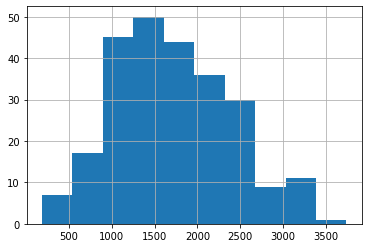

In [ ]:
df_offices_500m['ntb'].hist();

In [ ]:
df_offices_500m.shape

(250, 1048)

In [ ]:
df_offices_500m.head()

,id,ntb,latitude,longtitude,highway_motorway_500m,highway_trunk_500m,highway_primary_500m,highway_secondary_500m,highway_tertiary_500m,highway_unclassified_500m,highway_residential_500m,highway_motorway_link_500m,highway_trunk_link_500m,highway_primary_link_500m,highway_secondary_link_500m,highway_tertiary_link_500m,highway_living_street_500m,highway_service_500m,highway_pedestrian_500m,highway_track_500m,highway_bus_guideway_500m,highway_escape_500m,highway_raceway_500m,highway_road_500m,highway_busway_500m,highway_footway_500m,highway_bridleway_500m,highway_steps_500m,highway_corridor_500m,highway_path_500m,highway_cycleway_500m,highway_proposed_500m,highway_construction_500m,highway_bus_stop_500m,highway_crossing_500m,highway_elevator_500m,highway_emergency_bay_500m,highway_emergency_access_point_500m,highway_give_way_500m,highway_milestone_500m,...,natural_scree_500m,natural_sinkhole_500m,natural_stone_500m,natural_valley_500m,natural_volcano_500m,natural_user_defined_500m,route_bicycle_500m,route_bus_500m,route_canoe_500m,route_detour_500m,route_ferry_500m,route_foot_500m,route_hiking_500m,route_horse_500m,route_inline_skates_500m,route_light_rail_500m,route_mtb_500m,route_piste_500m,route_railway_500m,route_road_500m,route_running_500m,route_ski_500m,route_subway_500m,route_train_500m,route_tracks_500m,route_tram_500m,route_trolleybus_500m,route_user_defined_500m,boundary_aboriginal_lands_500m,boundary_administrative_500m,boundary_hazard_500m,boundary_maritime_500m,boundary_marker_500m,boundary_national_park_500m,boundary_place_500m,boundary_political_500m,boundary_postal_code_500m,boundary_protected_area_500m,boundary_special_economic_zone_500m,boundary_user_defined_500m
0,3.0,1308.0,55.685555,37.570230,0.0,0.0,16.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,243.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,12.0,0.0,5.0,0.0,0.0,2.0,17.0,65.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,2852.0,55.737389,37.617949,0.0,0.0,12.0,10.0,5.0,24.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,441.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,569.0,0.0,27.0,0.0,1.0,6.0,0.0,0.0,14.0,111.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7.0,1888.0,55.723640,37.610586,0.0,0.0,17.0,8.0,3.0,6.0,8.0,0.0,0.0,1.0,0.0,2.0,0.0,177.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,291.0,0.0,15.0,0.0,1.0,2.0,0.0,0.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.0,1666.0,55.788474,37.537555,0.0,0.0,0.0,0.0,27.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,297.0,0.0,14.0,0.0,4.0,6.0,0.0,4.0,13.0,63.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,1735.0,55.893520,37.615400,0.0,0.0,0.0,39.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,22.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_rent_500m.head()

,id_address,address,latitude,longtitude,highway_motorway_500m,highway_trunk_500m,highway_primary_500m,highway_secondary_500m,highway_tertiary_500m,highway_unclassified_500m,highway_residential_500m,highway_motorway_link_500m,highway_trunk_link_500m,highway_primary_link_500m,highway_secondary_link_500m,highway_tertiary_link_500m,highway_living_street_500m,highway_service_500m,highway_pedestrian_500m,highway_track_500m,highway_bus_guideway_500m,highway_escape_500m,highway_raceway_500m,highway_road_500m,highway_busway_500m,highway_footway_500m,highway_bridleway_500m,highway_steps_500m,highway_corridor_500m,highway_path_500m,highway_cycleway_500m,highway_proposed_500m,highway_construction_500m,highway_bus_stop_500m,highway_crossing_500m,highway_elevator_500m,highway_emergency_bay_500m,highway_emergency_access_point_500m,highway_give_way_500m,highway_milestone_500m,...,natural_scree_500m,natural_sinkhole_500m,natural_stone_500m,natural_valley_500m,natural_volcano_500m,natural_user_defined_500m,route_bicycle_500m,route_bus_500m,route_canoe_500m,route_detour_500m,route_ferry_500m,route_foot_500m,route_hiking_500m,route_horse_500m,route_inline_skates_500m,route_light_rail_500m,route_mtb_500m,route_piste_500m,route_railway_500m,route_road_500m,route_running_500m,route_ski_500m,route_subway_500m,route_train_500m,route_tracks_500m,route_tram_500m,route_trolleybus_500m,route_user_defined_500m,boundary_aboriginal_lands_500m,boundary_administrative_500m,boundary_hazard_500m,boundary_maritime_500m,boundary_marker_500m,boundary_national_park_500m,boundary_place_500m,boundary_political_500m,boundary_postal_code_500m,boundary_protected_area_500m,boundary_special_economic_zone_500m,boundary_user_defined_500m
0,0,"Москва, наб. Пресненская, 12",55.749452,37.537013,0.0,0.0,6.0,62.0,10.0,16.0,5.0,0.0,0.0,0.0,5.0,1.0,0.0,143.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,192.0,0.0,64.0,0.0,3.0,0.0,1.0,15.0,10.0,47.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"Москва, наб. Пресненская, 10",55.748843,37.535369,0.0,0.0,6.0,58.0,9.0,16.0,6.0,0.0,0.0,0.0,3.0,1.0,0.0,132.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,174.0,0.0,60.0,0.0,3.0,0.0,1.0,18.0,9.0,46.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,"Москва, Причальный проезд, 2",55.760470,37.519274,0.0,0.0,0.0,15.0,33.0,5.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,0.0,21.0,0.0,1.0,0.0,9.0,4.0,10.0,14.0,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,"Москва, Большая Семеновская ул., 10",55.782285,37.702644,0.0,0.0,0.0,44.0,31.0,12.0,20.0,0.0,0.0,0.0,18.0,5.0,0.0,237.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290.0,0.0,47.0,0.0,5.0,0.0,0.0,1.0,17.0,83.0,2.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,"Москва, Тверская ул., 8к1",55.758778,37.612124,0.0,0.0,27.0,2.0,18.0,40.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,554.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,997.0,0.0,174.0,2.0,0.0,4.0,0.0,0.0,12.0,64.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Selection of ML algorithm for different sets of features (500m, 1000m, 1500m)


In [30]:
def get_model_results(model, X_tr, y_tr, X_val, y_val, target_is_log=False):

  model.fit(X_tr, y_tr)

  model_predict_train = model.predict(X_tr)
  model_predict_val = model.predict(X_val)

  if target_is_log: 
    model_predict_train = np.exp(model_predict_train)
    model_predict_val = np.exp(model_predict_val)
    y_tr = np.exp(y_tr)
    y_val = np.exp(y_val)

  MAE_train = mean_absolute_error(y_tr, model_predict_train)
  RMSE_train = np.sqrt(mean_squared_error(y_tr, model_predict_train)) 

  MAE_valid = mean_absolute_error(y_val, model_predict_val)
  RMSE_valid = np.sqrt(mean_squared_error(y_val, model_predict_val)) 

  result = pd.DataFrame({'model': type(model).__name__, 
                         'MAE_train': MAE_train,
                         'RMSE_train': RMSE_train,
                         'MAE_valid': MAE_valid,
                         'RMSE_valid': RMSE_valid
                         }, index=[0])
  
  return result 

In [31]:
def get_agg_models_results(models_list, df, target_name):

  result = pd.DataFrame()

  df = df.drop(columns=['id', 'latitude', 'longtitude'])

  y = df[target_name]
  X = df.drop(columns=[target_name])

  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

  # baseline 
  baseline_tr = pd.DataFrame({'y_train': y_train, 'y_train_mean': y_train.mean()})
  baseline_tr['AE'] = np.abs(baseline_tr['y_train'] - baseline_tr['y_train_mean'])
  baseline_tr['SAE'] = np.sqrt((baseline_tr['y_train'] - baseline_tr['y_train_mean']) ** 2)

  baseline_vl = pd.DataFrame({'y_valid': y_valid, 'y_valid_mean': y_valid.mean()})
  baseline_vl['AE'] = np.abs(baseline_vl['y_valid'] - baseline_vl['y_valid_mean'])
  baseline_vl['SAE'] = np.sqrt((baseline_vl['y_valid'] - baseline_vl['y_valid_mean']) ** 2)

  res_baseline = pd.DataFrame({'model': 'baseline (mean)', 
                               'MAE_train': baseline_tr['AE'].mean(),
                               'RMSE_train': baseline_tr['SAE'].mean(),
                               'MAE_valid': baseline_vl['AE'].mean(),
                               'RMSE_valid': baseline_vl['SAE'].mean()
                         }, index=[0])


  result = pd.concat([result, res_baseline])
  
  for model in models_list: 
    res = get_model_results(model, X_train, y_train, X_valid, y_valid, target_is_log=False)
    
    result = pd.concat([result, res])

  return result

In [ ]:
rf = RandomForestRegressor(random_state=17)
lgbm = lgb.LGBMRegressor(random_state=17)
ridge = RidgeCV()

In [ ]:
models_list = [rf, lgbm, ridge]

## radius 500m

In [ ]:
result_500m = get_agg_models_results(models_list, df_offices_500m, 'ntb')

In [ ]:
result_500m 

,model,MAE_train,RMSE_train,MAE_valid,RMSE_valid
0,baseline (mean),563.715200,563.715200,536.612267,536.612267
0,RandomForestRegressor,156.253714,195.233759,383.974000,487.818024
0,LGBMRegressor,74.904929,98.337391,388.488164,509.372752
0,RidgeCV,26.857282,45.343341,853.342335,1081.176238


In [ ]:
# result_500m.to_csv('result_500m.csv')

## radius 1000m

In [ ]:
result_1000m = get_agg_models_results(models_list, df_offices_1000m, 'ntb')

In [ ]:
result_1000m 

,model,MAE_train,RMSE_train,MAE_valid,RMSE_valid
0,baseline (mean),563.715200,563.715200,536.612267,536.612267
0,RandomForestRegressor,151.217314,182.555776,395.784667,493.661893
0,LGBMRegressor,61.208629,88.442328,420.313850,522.008985
0,RidgeCV,16.183382,43.765640,927.105574,1224.510552


In [ ]:
# result_1000m.to_csv('result_1000m.csv')

## radius 1500m

In [ ]:
result_1500m = get_agg_models_results(models_list, df_offices_1500m, 'ntb')

In [ ]:
result_1500m 

,model,MAE_train,RMSE_train,MAE_valid,RMSE_valid
0,baseline (mean),563.715200,563.715200,536.612267,536.612267
0,RandomForestRegressor,151.717886,188.798923,404.233600,514.667170
0,LGBMRegressor,70.289139,99.263074,399.818997,514.030787
0,RidgeCV,10.838676,27.599357,967.450176,1273.600636


In [ ]:
# result_1500m.to_csv('result_1500m.csv')

## radius 500m and 1000m

In [ ]:
df_offices_500m.head()

,id,ntb,latitude,longtitude,highway_motorway_500m,highway_trunk_500m,highway_primary_500m,highway_secondary_500m,highway_tertiary_500m,highway_unclassified_500m,highway_residential_500m,highway_motorway_link_500m,highway_trunk_link_500m,highway_primary_link_500m,highway_secondary_link_500m,highway_tertiary_link_500m,highway_living_street_500m,highway_service_500m,highway_pedestrian_500m,highway_track_500m,highway_bus_guideway_500m,highway_escape_500m,highway_raceway_500m,highway_road_500m,highway_busway_500m,highway_footway_500m,highway_bridleway_500m,highway_steps_500m,highway_corridor_500m,highway_path_500m,highway_cycleway_500m,highway_proposed_500m,highway_construction_500m,highway_bus_stop_500m,highway_crossing_500m,highway_elevator_500m,highway_emergency_bay_500m,highway_emergency_access_point_500m,highway_give_way_500m,highway_milestone_500m,...,natural_scree_500m,natural_sinkhole_500m,natural_stone_500m,natural_valley_500m,natural_volcano_500m,natural_user_defined_500m,route_bicycle_500m,route_bus_500m,route_canoe_500m,route_detour_500m,route_ferry_500m,route_foot_500m,route_hiking_500m,route_horse_500m,route_inline_skates_500m,route_light_rail_500m,route_mtb_500m,route_piste_500m,route_railway_500m,route_road_500m,route_running_500m,route_ski_500m,route_subway_500m,route_train_500m,route_tracks_500m,route_tram_500m,route_trolleybus_500m,route_user_defined_500m,boundary_aboriginal_lands_500m,boundary_administrative_500m,boundary_hazard_500m,boundary_maritime_500m,boundary_marker_500m,boundary_national_park_500m,boundary_place_500m,boundary_political_500m,boundary_postal_code_500m,boundary_protected_area_500m,boundary_special_economic_zone_500m,boundary_user_defined_500m
0,3.0,1308.0,55.685555,37.570230,0.0,0.0,16.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,243.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,12.0,0.0,5.0,0.0,0.0,2.0,17.0,65.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,2852.0,55.737389,37.617949,0.0,0.0,12.0,10.0,5.0,24.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,441.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,569.0,0.0,27.0,0.0,1.0,6.0,0.0,0.0,14.0,111.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7.0,1888.0,55.723640,37.610586,0.0,0.0,17.0,8.0,3.0,6.0,8.0,0.0,0.0,1.0,0.0,2.0,0.0,177.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,291.0,0.0,15.0,0.0,1.0,2.0,0.0,0.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.0,1666.0,55.788474,37.537555,0.0,0.0,0.0,0.0,27.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,297.0,0.0,14.0,0.0,4.0,6.0,0.0,4.0,13.0,63.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,1735.0,55.893520,37.615400,0.0,0.0,0.0,39.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,22.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_offices_1000m.head()

,id,ntb,latitude,longtitude,highway_motorway_1000m,highway_trunk_1000m,highway_primary_1000m,highway_secondary_1000m,highway_tertiary_1000m,highway_unclassified_1000m,highway_residential_1000m,highway_motorway_link_1000m,highway_trunk_link_1000m,highway_primary_link_1000m,highway_secondary_link_1000m,highway_tertiary_link_1000m,highway_living_street_1000m,highway_service_1000m,highway_pedestrian_1000m,highway_track_1000m,highway_bus_guideway_1000m,highway_escape_1000m,highway_raceway_1000m,highway_road_1000m,highway_busway_1000m,highway_footway_1000m,highway_bridleway_1000m,highway_steps_1000m,highway_corridor_1000m,highway_path_1000m,highway_cycleway_1000m,highway_proposed_1000m,highway_construction_1000m,highway_bus_stop_1000m,highway_crossing_1000m,highway_elevator_1000m,highway_emergency_bay_1000m,highway_emergency_access_point_1000m,highway_give_way_1000m,highway_milestone_1000m,...,natural_scree_1000m,natural_sinkhole_1000m,natural_stone_1000m,natural_valley_1000m,natural_volcano_1000m,natural_user_defined_1000m,route_bicycle_1000m,route_bus_1000m,route_canoe_1000m,route_detour_1000m,route_ferry_1000m,route_foot_1000m,route_hiking_1000m,route_horse_1000m,route_inline_skates_1000m,route_light_rail_1000m,route_mtb_1000m,route_piste_1000m,route_railway_1000m,route_road_1000m,route_running_1000m,route_ski_1000m,route_subway_1000m,route_train_1000m,route_tracks_1000m,route_tram_1000m,route_trolleybus_1000m,route_user_defined_1000m,boundary_aboriginal_lands_1000m,boundary_administrative_1000m,boundary_hazard_1000m,boundary_maritime_1000m,boundary_marker_1000m,boundary_national_park_1000m,boundary_place_1000m,boundary_political_1000m,boundary_postal_code_1000m,boundary_protected_area_1000m,boundary_special_economic_zone_1000m,boundary_user_defined_1000m
0,3.0,1308.0,55.685555,37.570230,0.0,0.0,35.0,44.0,59.0,18.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,742.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,907.0,0.0,58.0,0.0,20.0,0.0,0.0,2.0,51.0,189.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,2852.0,55.737389,37.617949,0.0,0.0,92.0,68.0,54.0,84.0,70.0,0.0,0.0,27.0,10.0,1.0,3.0,1537.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,2311.0,0.0,235.0,0.0,3.0,13.0,0.0,0.0,52.0,379.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7.0,1888.0,55.723640,37.610586,0.0,0.0,94.0,26.0,16.0,39.0,24.0,0.0,0.0,28.0,5.0,3.0,2.0,745.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1411.0,0.0,128.0,1.0,10.0,8.0,0.0,0.0,45.0,172.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.0,1666.0,55.788474,37.537555,0.0,0.0,8.0,16.0,94.0,33.0,27.0,0.0,0.0,0.0,9.0,1.0,0.0,563.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,837.0,0.0,28.0,0.0,16.0,7.0,0.0,4.0,34.0,160.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,1735.0,55.893520,37.615400,0.0,4.0,0.0,46.0,35.0,2.0,19.0,0.0,0.0,0.0,0.0,4.0,0.0,578.0,4.0,11.0,0.0,0.0,0.0,0.0,0.0,474.0,0.0,38.0,0.0,35.0,1.0,0.0,0.0,57.0,55.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_offices_500m_1000m = pd.merge(df_offices_500m, df_offices_1000m.drop(columns=['ntb', 'latitude', 'longtitude']), how='inner', on='id')

In [ ]:
df_offices_500m_1000m.shape

(250, 2092)

In [ ]:
result_500m_1000m = get_agg_models_results(models_list, df_offices_500m_1000m, 'ntb')

In [ ]:
result_500m_1000m 

,model,MAE_train,RMSE_train,MAE_valid,RMSE_valid
0,baseline (mean),563.715200,563.715200,536.612267,536.612267
0,RandomForestRegressor,148.919086,180.829719,375.722400,472.789870
0,LGBMRegressor,51.627721,74.923317,402.596034,502.263057
0,RidgeCV,6.328435,26.435551,775.814447,1082.959460


In [ ]:
# result_500m_1000m.to_csv('result_500m_1000m.csv')

## radius 1000m and 1500m

In [ ]:
df_offices_1000m_1500m = pd.merge(df_offices_1000m, df_offices_1500m.drop(columns=['ntb', 'latitude', 'longtitude']), how='inner', on='id')

In [ ]:
df_offices_1000m_1500m.shape

(250, 2092)

In [ ]:
result_1000m_1500m = get_agg_models_results(models_list, df_offices_1000m_1500m, 'ntb')

In [ ]:
result_1000m_1500m 

,model,MAE_train,RMSE_train,MAE_valid,RMSE_valid
0,baseline (mean),563.715200,563.715200,536.612267,536.612267
0,RandomForestRegressor,147.138057,180.779206,395.761467,496.010309
0,LGBMRegressor,50.137050,75.969981,406.688015,513.998297
0,RidgeCV,3.446376,16.736244,991.571304,1331.124640


In [ ]:
# result_1000m_1500m.to_csv('result_1000m_1500m.csv')

## all objects

In [ ]:
df_offices_500m_1000m.head()

,id,ntb,latitude,longtitude,highway_motorway_500m,highway_trunk_500m,highway_primary_500m,highway_secondary_500m,highway_tertiary_500m,highway_unclassified_500m,highway_residential_500m,highway_motorway_link_500m,highway_trunk_link_500m,highway_primary_link_500m,highway_secondary_link_500m,highway_tertiary_link_500m,highway_living_street_500m,highway_service_500m,highway_pedestrian_500m,highway_track_500m,highway_bus_guideway_500m,highway_escape_500m,highway_raceway_500m,highway_road_500m,highway_busway_500m,highway_footway_500m,highway_bridleway_500m,highway_steps_500m,highway_corridor_500m,highway_path_500m,highway_cycleway_500m,highway_proposed_500m,highway_construction_500m,highway_bus_stop_500m,highway_crossing_500m,highway_elevator_500m,highway_emergency_bay_500m,highway_emergency_access_point_500m,highway_give_way_500m,highway_milestone_500m,...,natural_scree_1000m,natural_sinkhole_1000m,natural_stone_1000m,natural_valley_1000m,natural_volcano_1000m,natural_user_defined_1000m,route_bicycle_1000m,route_bus_1000m,route_canoe_1000m,route_detour_1000m,route_ferry_1000m,route_foot_1000m,route_hiking_1000m,route_horse_1000m,route_inline_skates_1000m,route_light_rail_1000m,route_mtb_1000m,route_piste_1000m,route_railway_1000m,route_road_1000m,route_running_1000m,route_ski_1000m,route_subway_1000m,route_train_1000m,route_tracks_1000m,route_tram_1000m,route_trolleybus_1000m,route_user_defined_1000m,boundary_aboriginal_lands_1000m,boundary_administrative_1000m,boundary_hazard_1000m,boundary_maritime_1000m,boundary_marker_1000m,boundary_national_park_1000m,boundary_place_1000m,boundary_political_1000m,boundary_postal_code_1000m,boundary_protected_area_1000m,boundary_special_economic_zone_1000m,boundary_user_defined_1000m
0,3.0,1308.0,55.685555,37.570230,0.0,0.0,16.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,243.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,12.0,0.0,5.0,0.0,0.0,2.0,17.0,65.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,2852.0,55.737389,37.617949,0.0,0.0,12.0,10.0,5.0,24.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,441.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,569.0,0.0,27.0,0.0,1.0,6.0,0.0,0.0,14.0,111.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7.0,1888.0,55.723640,37.610586,0.0,0.0,17.0,8.0,3.0,6.0,8.0,0.0,0.0,1.0,0.0,2.0,0.0,177.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,291.0,0.0,15.0,0.0,1.0,2.0,0.0,0.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.0,1666.0,55.788474,37.537555,0.0,0.0,0.0,0.0,27.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,297.0,0.0,14.0,0.0,4.0,6.0,0.0,4.0,13.0,63.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,1735.0,55.893520,37.615400,0.0,0.0,0.0,39.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,22.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_offices_1500m.head()

,id,ntb,latitude,longtitude,highway_motorway_1500m,highway_trunk_1500m,highway_primary_1500m,highway_secondary_1500m,highway_tertiary_1500m,highway_unclassified_1500m,highway_residential_1500m,highway_motorway_link_1500m,highway_trunk_link_1500m,highway_primary_link_1500m,highway_secondary_link_1500m,highway_tertiary_link_1500m,highway_living_street_1500m,highway_service_1500m,highway_pedestrian_1500m,highway_track_1500m,highway_bus_guideway_1500m,highway_escape_1500m,highway_raceway_1500m,highway_road_1500m,highway_busway_1500m,highway_footway_1500m,highway_bridleway_1500m,highway_steps_1500m,highway_corridor_1500m,highway_path_1500m,highway_cycleway_1500m,highway_proposed_1500m,highway_construction_1500m,highway_bus_stop_1500m,highway_crossing_1500m,highway_elevator_1500m,highway_emergency_bay_1500m,highway_emergency_access_point_1500m,highway_give_way_1500m,highway_milestone_1500m,...,natural_scree_1500m,natural_sinkhole_1500m,natural_stone_1500m,natural_valley_1500m,natural_volcano_1500m,natural_user_defined_1500m,route_bicycle_1500m,route_bus_1500m,route_canoe_1500m,route_detour_1500m,route_ferry_1500m,route_foot_1500m,route_hiking_1500m,route_horse_1500m,route_inline_skates_1500m,route_light_rail_1500m,route_mtb_1500m,route_piste_1500m,route_railway_1500m,route_road_1500m,route_running_1500m,route_ski_1500m,route_subway_1500m,route_train_1500m,route_tracks_1500m,route_tram_1500m,route_trolleybus_1500m,route_user_defined_1500m,boundary_aboriginal_lands_1500m,boundary_administrative_1500m,boundary_hazard_1500m,boundary_maritime_1500m,boundary_marker_1500m,boundary_national_park_1500m,boundary_place_1500m,boundary_political_1500m,boundary_postal_code_1500m,boundary_protected_area_1500m,boundary_special_economic_zone_1500m,boundary_user_defined_1500m
0,3.0,1308.0,55.685555,37.570230,0.0,0.0,37.0,79.0,98.0,29.0,10.0,0.0,0.0,0.0,5.0,12.0,1.0,1317.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1431.0,0.0,103.0,3.0,30.0,0.0,0.0,2.0,102.0,326.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,2852.0,55.737389,37.617949,0.0,0.0,182.0,226.0,88.0,152.0,99.0,0.0,0.0,28.0,17.0,6.0,3.0,2904.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,4259.0,0.0,432.0,0.0,20.0,21.0,0.0,8.0,110.0,738.0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7.0,1888.0,55.723640,37.610586,0.0,0.0,147.0,95.0,39.0,134.0,76.0,0.0,0.0,33.0,16.0,3.0,2.0,2053.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,3477.0,0.0,284.0,2.0,26.0,16.0,0.0,4.0,92.0,510.0,5.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.0,1666.0,55.788474,37.537555,0.0,0.0,22.0,79.0,183.0,52.0,99.0,0.0,0.0,1.0,22.0,6.0,0.0,1618.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2629.0,3.0,141.0,0.0,111.0,7.0,0.0,7.0,109.0,369.0,14.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,1735.0,55.893520,37.615400,0.0,6.0,0.0,60.0,61.0,4.0,43.0,0.0,0.0,0.0,0.0,4.0,0.0,1123.0,4.0,25.0,0.0,0.0,0.0,0.0,0.0,874.0,4.0,63.0,0.0,99.0,5.0,0.0,0.0,85.0,93.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_offices_all = pd.merge(df_offices_500m_1000m, df_offices_1500m.drop(columns=['ntb', 'latitude', 'longtitude']), how='inner', on='id')

In [ ]:
df_offices_all.shape

(250, 3136)

In [ ]:
result_all = get_agg_models_results(models_list, df_offices_all, 'ntb')

In [ ]:
result_all 

,model,MAE_train,RMSE_train,MAE_valid,RMSE_valid
0,baseline (mean),563.715200,563.715200,536.612267,536.612267
0,RandomForestRegressor,149.015257,182.292554,389.119200,486.687675
0,LGBMRegressor,42.102993,63.917050,398.529859,504.769953
0,RidgeCV,2.325568,12.438432,895.457041,1178.938842


In [ ]:
# result_all.to_csv('result_all.csv')

In [ ]:
# для таблы статьи 
list_of_results = [result_500m, result_1000m, result_1500m, result_500m_1000m, result_1000m_1500m, result_all]
list_of_name_results = ['objects_around_500m', 'objects_around_1000m', 'objects_around_1500m', 'objects_around_500m_1000m', 'objects_around_1000m_1500m', 'objects_around_500m_1000m_1500m']

df_with_results = pd.DataFrame()

for res, res_name in zip(list_of_results, list_of_name_results):
  res['dataset'] = res_name 
  df_with_results = pd.concat([df_with_results, res], axis=0)

df_with_results

,model,MAE_train,RMSE_train,MAE_valid,RMSE_valid,dataset
0,baseline (mean),563.715200,563.715200,536.612267,536.612267,objects_around_500m
0,RandomForestRegressor,156.253714,195.233759,383.974000,487.818024,objects_around_500m
0,LGBMRegressor,74.904929,98.337391,388.488164,509.372752,objects_around_500m
0,RidgeCV,26.857282,45.343341,853.342335,1081.176238,objects_around_500m
0,baseline (mean),563.715200,563.715200,536.612267,536.612267,objects_around_1000m
0,RandomForestRegressor,151.217314,182.555776,395.784667,493.661893,objects_around_1000m
0,LGBMRegressor,61.208629,88.442328,420.313850,522.008985,objects_around_1000m
0,RidgeCV,16.183382,43.765640,927.105574,1224.510552,objects_around_1000m
0,baseline (mean),563.715200,563.715200,536.612267,536.612267,objects_around_1500m
0,RandomForestRegressor,151.717886,188.798923,404.233600,514.667170,objects_around_1500m


In [ ]:
df_with_results.to_csv('df_with_results.csv')

Выбираем случайный лес в качестве основного алгоритма. Будем использовать все объекты - полный датасэт. Отберем наиболее важные фичи далее ниже

In [ ]:
df_offices_all.head()

,id,ntb,latitude,longtitude,highway_motorway_500m,highway_trunk_500m,highway_primary_500m,highway_secondary_500m,highway_tertiary_500m,highway_unclassified_500m,highway_residential_500m,highway_motorway_link_500m,highway_trunk_link_500m,highway_primary_link_500m,highway_secondary_link_500m,highway_tertiary_link_500m,highway_living_street_500m,highway_service_500m,highway_pedestrian_500m,highway_track_500m,highway_bus_guideway_500m,highway_escape_500m,highway_raceway_500m,highway_road_500m,highway_busway_500m,highway_footway_500m,highway_bridleway_500m,highway_steps_500m,highway_corridor_500m,highway_path_500m,highway_cycleway_500m,highway_proposed_500m,highway_construction_500m,highway_bus_stop_500m,highway_crossing_500m,highway_elevator_500m,highway_emergency_bay_500m,highway_emergency_access_point_500m,highway_give_way_500m,highway_milestone_500m,...,natural_scree_1500m,natural_sinkhole_1500m,natural_stone_1500m,natural_valley_1500m,natural_volcano_1500m,natural_user_defined_1500m,route_bicycle_1500m,route_bus_1500m,route_canoe_1500m,route_detour_1500m,route_ferry_1500m,route_foot_1500m,route_hiking_1500m,route_horse_1500m,route_inline_skates_1500m,route_light_rail_1500m,route_mtb_1500m,route_piste_1500m,route_railway_1500m,route_road_1500m,route_running_1500m,route_ski_1500m,route_subway_1500m,route_train_1500m,route_tracks_1500m,route_tram_1500m,route_trolleybus_1500m,route_user_defined_1500m,boundary_aboriginal_lands_1500m,boundary_administrative_1500m,boundary_hazard_1500m,boundary_maritime_1500m,boundary_marker_1500m,boundary_national_park_1500m,boundary_place_1500m,boundary_political_1500m,boundary_postal_code_1500m,boundary_protected_area_1500m,boundary_special_economic_zone_1500m,boundary_user_defined_1500m
0,3.0,1308.0,55.685555,37.570230,0.0,0.0,16.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,243.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,12.0,0.0,5.0,0.0,0.0,2.0,17.0,65.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,2852.0,55.737389,37.617949,0.0,0.0,12.0,10.0,5.0,24.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,441.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,569.0,0.0,27.0,0.0,1.0,6.0,0.0,0.0,14.0,111.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7.0,1888.0,55.723640,37.610586,0.0,0.0,17.0,8.0,3.0,6.0,8.0,0.0,0.0,1.0,0.0,2.0,0.0,177.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,291.0,0.0,15.0,0.0,1.0,2.0,0.0,0.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.0,1666.0,55.788474,37.537555,0.0,0.0,0.0,0.0,27.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,297.0,0.0,14.0,0.0,4.0,6.0,0.0,4.0,13.0,63.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,1735.0,55.893520,37.615400,0.0,0.0,0.0,39.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,22.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# сохраним рез-т
# df_offices_all.to_csv(PATH+'prepared_data/'+'df_offices_all.csv')

# Dataframe for model

In [26]:
df_offices_all = pd.read_csv(PATH+'prepared_data/'+'df_offices_all.csv', index_col=[0])
df_offices_all.head()

,id,ntb,latitude,longtitude,highway_motorway_500m,highway_trunk_500m,highway_primary_500m,highway_secondary_500m,highway_tertiary_500m,highway_unclassified_500m,highway_residential_500m,highway_motorway_link_500m,highway_trunk_link_500m,highway_primary_link_500m,highway_secondary_link_500m,highway_tertiary_link_500m,highway_living_street_500m,highway_service_500m,highway_pedestrian_500m,highway_track_500m,highway_bus_guideway_500m,highway_escape_500m,highway_raceway_500m,highway_road_500m,highway_busway_500m,highway_footway_500m,highway_bridleway_500m,highway_steps_500m,highway_corridor_500m,highway_path_500m,highway_cycleway_500m,highway_proposed_500m,highway_construction_500m,highway_bus_stop_500m,highway_crossing_500m,highway_elevator_500m,highway_emergency_bay_500m,highway_emergency_access_point_500m,highway_give_way_500m,highway_milestone_500m,...,natural_scree_1500m,natural_sinkhole_1500m,natural_stone_1500m,natural_valley_1500m,natural_volcano_1500m,natural_user_defined_1500m,route_bicycle_1500m,route_bus_1500m,route_canoe_1500m,route_detour_1500m,route_ferry_1500m,route_foot_1500m,route_hiking_1500m,route_horse_1500m,route_inline_skates_1500m,route_light_rail_1500m,route_mtb_1500m,route_piste_1500m,route_railway_1500m,route_road_1500m,route_running_1500m,route_ski_1500m,route_subway_1500m,route_train_1500m,route_tracks_1500m,route_tram_1500m,route_trolleybus_1500m,route_user_defined_1500m,boundary_aboriginal_lands_1500m,boundary_administrative_1500m,boundary_hazard_1500m,boundary_maritime_1500m,boundary_marker_1500m,boundary_national_park_1500m,boundary_place_1500m,boundary_political_1500m,boundary_postal_code_1500m,boundary_protected_area_1500m,boundary_special_economic_zone_1500m,boundary_user_defined_1500m
0,3.0,1308.0,55.685555,37.570230,0.0,0.0,16.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,243.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,12.0,0.0,5.0,0.0,0.0,2.0,17.0,65.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,2852.0,55.737389,37.617949,0.0,0.0,12.0,10.0,5.0,24.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,441.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,569.0,0.0,27.0,0.0,1.0,6.0,0.0,0.0,14.0,111.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7.0,1888.0,55.723640,37.610586,0.0,0.0,17.0,8.0,3.0,6.0,8.0,0.0,0.0,1.0,0.0,2.0,0.0,177.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,291.0,0.0,15.0,0.0,1.0,2.0,0.0,0.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.0,1666.0,55.788474,37.537555,0.0,0.0,0.0,0.0,27.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,297.0,0.0,14.0,0.0,4.0,6.0,0.0,4.0,13.0,63.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,1735.0,55.893520,37.615400,0.0,0.0,0.0,39.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,22.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_offices_all = df_offices_all.drop(columns=['id', 'latitude', 'longtitude'])

## Split data

In [28]:
y = df_offices_all['ntb']
X = df_offices_all.drop(columns=['ntb'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameters

In [ ]:
# fmin
def rfc_evaluate(space): 
   
  space['max_depth'] = int(space['max_depth'])
  space['max_features'] = int(space['max_features'])
  space['n_estimators'] = int(space['n_estimators'])
  space['min_samples_leaf'] = int(space['min_samples_leaf'])
  space['min_samples_split'] = int(space['min_samples_split'])

  # Model
  model = RandomForestRegressor(**space)
  model.fit(X_train, y_train)

  # Metric
  y_pred_val = model.predict(X_valid)
  s_val = np.sqrt(mean_squared_error(y_valid, y_pred_val))

  print(f'loss {s_val}, finished at {time.ctime()}')
    
  return s_val

In [ ]:
trials = Trials()

In [ ]:
space = {
    'max_depth': hp.uniform('max_depth', 2, 15), 
    'max_features': hp.uniform('max_features', 5, 1000), 
    'n_estimators': hp.uniform('n_estimators', 5, 50), 
    'min_samples_leaf': hp.uniform('min_samples_leaf', 1, 10), 
    'min_samples_split': hp.uniform('min_samples_split', 3, 10), 
    'criterion': hp.choice('criterion', ['squared_error', 'absolute_error', 'poisson']), 
    'n_jobs': -1,
    'random_state': 17
}

In [ ]:
best = fmin(fn = rfc_evaluate, 
            space = space, 
            algo = tpe.suggest, 
            trials = trials, 
            max_evals = 50)

loss 508.8162402765106, finished at Wed Jan 12 18:02:43 2022
loss 560.8845962598479, finished at Wed Jan 12 18:02:44 2022
loss 534.1862371411687, finished at Wed Jan 12 18:02:44 2022
loss 478.4693943378481, finished at Wed Jan 12 18:02:46 2022
loss 576.4798262708005, finished at Wed Jan 12 18:02:46 2022
loss 504.27425380704096, finished at Wed Jan 12 18:02:47 2022
loss 513.2337127586584, finished at Wed Jan 12 18:02:47 2022
loss 525.5253305643341, finished at Wed Jan 12 18:02:48 2022
loss 574.0311691455123, finished at Wed Jan 12 18:02:48 2022
loss 506.39104713214425, finished at Wed Jan 12 18:02:48 2022
loss 484.0073564589058, finished at Wed Jan 12 18:02:49 2022
loss 503.60162815926213, finished at Wed Jan 12 18:02:50 2022
loss 498.67298568072374, finished at Wed Jan 12 18:02:51 2022
loss 508.9924019726242, finished at Wed Jan 12 18:02:51 2022
loss 528.4743712709084, finished at Wed Jan 12 18:02:52 2022
loss 515.8246935035273, finished at Wed Jan 12 18:02:52 2022
loss 511.41904915237

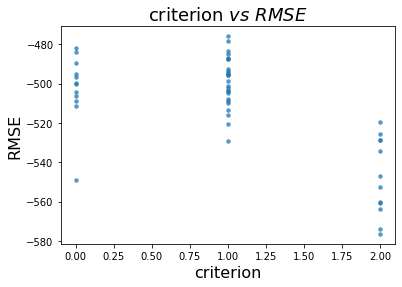

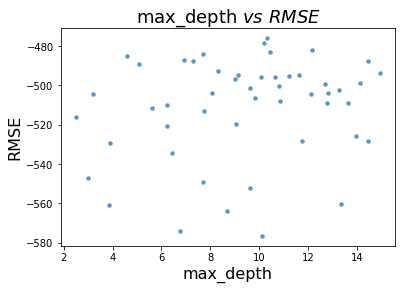

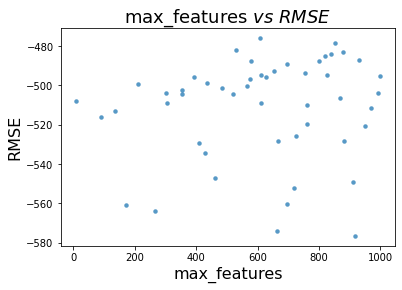

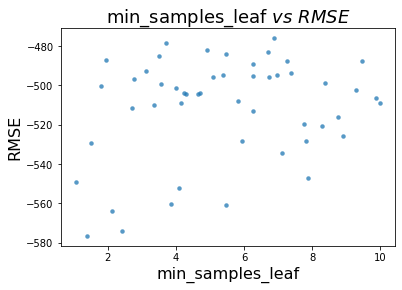

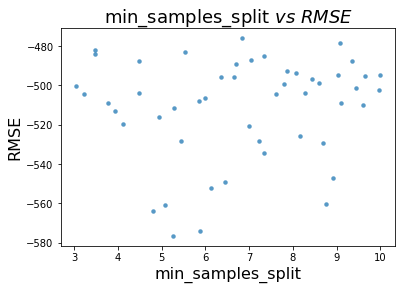

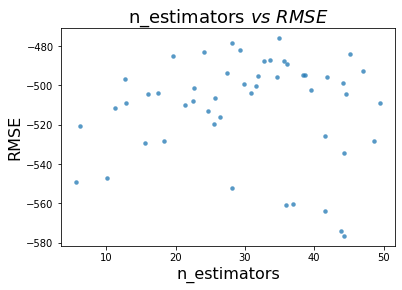

In [ ]:
for i in best.items(): 
  f, ax = plt.subplots(1)
  xs = [t['misc']['vals'][i[0]] for t in trials.trials]
  ys = [t['result']['loss']*(-1) for t in trials.trials]
  ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
  ax.set_title(i[0] + ' $vs$ $RMSE$ ', fontsize=18)
  ax.set_xlabel(i[0], fontsize=16)
  ax.set_ylabel('RMSE', fontsize=16);

Подкорректируем гиперпараметры

In [ ]:
space = {
    'max_depth': hp.uniform('max_depth', 10, 15), 
    'max_features': hp.uniform('max_features', 600, 1000), 
    'n_estimators': hp.uniform('n_estimators', 30, 50), 
    'min_samples_leaf': hp.uniform('min_samples_leaf', 4, 10), 
    'min_samples_split': hp.uniform('min_samples_split', 6, 10), 
    'criterion': 'squared_error', 
    'n_jobs': -1,
    'random_state': 17
}

In [ ]:
trials = Trials()

In [ ]:
best = fmin(fn = rfc_evaluate, 
            space = space, 
            algo = tpe.suggest, 
            trials = trials, 
            max_evals = 50)

loss 490.310426991777, finished at Wed Jan 12 18:03:23 2022
loss 481.45601601229384, finished at Wed Jan 12 18:03:23 2022
loss 489.208742990783, finished at Wed Jan 12 18:03:24 2022
loss 473.3953944086491, finished at Wed Jan 12 18:03:24 2022
loss 481.72396843637307, finished at Wed Jan 12 18:03:24 2022
loss 492.00138624942343, finished at Wed Jan 12 18:03:25 2022
loss 488.81636091963213, finished at Wed Jan 12 18:03:25 2022
loss 488.10826196563653, finished at Wed Jan 12 18:03:26 2022
loss 494.5331818975762, finished at Wed Jan 12 18:03:26 2022
loss 505.38274937670997, finished at Wed Jan 12 18:03:27 2022
loss 494.30540699241357, finished at Wed Jan 12 18:03:27 2022
loss 500.3576485158336, finished at Wed Jan 12 18:03:28 2022
loss 493.2145241234289, finished at Wed Jan 12 18:03:28 2022
loss 487.302943629947, finished at Wed Jan 12 18:03:29 2022
loss 487.1166897918053, finished at Wed Jan 12 18:03:29 2022
loss 495.043100991125, finished at Wed Jan 12 18:03:29 2022
loss 488.267443390105

In [ ]:
best['max_depth'] = int(best['max_depth'])
best['max_features'] = int(best['max_features'])
best['n_estimators'] = int(best['n_estimators'])
best['min_samples_leaf'] = int(best['min_samples_leaf'])
best['min_samples_split'] = int(best['min_samples_split'])
best

{'max_depth': 11,
 'max_features': 993,
 'min_samples_leaf': 9,
 'min_samples_split': 7,
 'n_estimators': 35}

## Model with oprimal hyperparameters

In [ ]:
opt_params = {'max_depth': 11,
 'max_features': 993,
 'min_samples_leaf': 9,
 'min_samples_split': 7,
 'n_estimators': 35,
 'random_state': 17}

In [ ]:
model = RandomForestRegressor(**opt_params)

In [ ]:
get_model_results(model, X_train, y_train, X_valid, y_valid, target_is_log=False)

,data type,MAE,RMSE
0,train,272.374465,334.457834
1,valid,384.856337,473.395394


In [ ]:
# model with default params
get_model_results(RandomForestRegressor(random_state=17), X_train, y_train, X_valid, y_valid, target_is_log=False)

,data type,MAE,RMSE
0,train,149.015257,182.292554
1,valid,389.119200,486.687675


# Final model

In [23]:
opt_params = {'max_depth': 11,
 'max_features': 993,
 'min_samples_leaf': 9,
 'min_samples_split': 7,
 'n_estimators': 35,
 'random_state': 17}

In [24]:
model = RandomForestRegressor(**opt_params)

In [32]:
get_model_results(model, X_train, y_train, X_valid, y_valid, target_is_log=False)

,model,MAE_train,RMSE_train,MAE_valid,RMSE_valid
0,RandomForestRegressor,272.374465,334.457834,384.856337,473.395394


# Predict client flow for vacancies

### prepare data

In [ ]:
df_rent_500m.head(2)

,id_address,address,latitude,longtitude,highway_motorway_500m,highway_trunk_500m,highway_primary_500m,highway_secondary_500m,highway_tertiary_500m,highway_unclassified_500m,highway_residential_500m,highway_motorway_link_500m,highway_trunk_link_500m,highway_primary_link_500m,highway_secondary_link_500m,highway_tertiary_link_500m,highway_living_street_500m,highway_service_500m,highway_pedestrian_500m,highway_track_500m,highway_bus_guideway_500m,highway_escape_500m,highway_raceway_500m,highway_road_500m,highway_busway_500m,highway_footway_500m,highway_bridleway_500m,highway_steps_500m,highway_corridor_500m,highway_path_500m,highway_cycleway_500m,highway_proposed_500m,highway_construction_500m,highway_bus_stop_500m,highway_crossing_500m,highway_elevator_500m,highway_emergency_bay_500m,highway_emergency_access_point_500m,highway_give_way_500m,highway_milestone_500m,...,natural_scree_500m,natural_sinkhole_500m,natural_stone_500m,natural_valley_500m,natural_volcano_500m,natural_user_defined_500m,route_bicycle_500m,route_bus_500m,route_canoe_500m,route_detour_500m,route_ferry_500m,route_foot_500m,route_hiking_500m,route_horse_500m,route_inline_skates_500m,route_light_rail_500m,route_mtb_500m,route_piste_500m,route_railway_500m,route_road_500m,route_running_500m,route_ski_500m,route_subway_500m,route_train_500m,route_tracks_500m,route_tram_500m,route_trolleybus_500m,route_user_defined_500m,boundary_aboriginal_lands_500m,boundary_administrative_500m,boundary_hazard_500m,boundary_maritime_500m,boundary_marker_500m,boundary_national_park_500m,boundary_place_500m,boundary_political_500m,boundary_postal_code_500m,boundary_protected_area_500m,boundary_special_economic_zone_500m,boundary_user_defined_500m
0,0,"Москва, наб. Пресненская, 12",55.749452,37.537013,0.0,0.0,6.0,62.0,10.0,16.0,5.0,0.0,0.0,0.0,5.0,1.0,0.0,143.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,192.0,0.0,64.0,0.0,3.0,0.0,1.0,15.0,10.0,47.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"Москва, наб. Пресненская, 10",55.748843,37.535369,0.0,0.0,6.0,58.0,9.0,16.0,6.0,0.0,0.0,0.0,3.0,1.0,0.0,132.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,174.0,0.0,60.0,0.0,3.0,0.0,1.0,18.0,9.0,46.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_rent_all = pd.merge(df_rent_500m, df_rent_1000m.drop(columns=['address', 'latitude', 'longtitude']), how='inner', on='id_address')

In [ ]:
df_rent_all = pd.merge(df_rent_all, df_rent_1500m.drop(columns=['address', 'latitude', 'longtitude']), how='inner', on='id_address')
df_rent_all.head()

,id_address,address,latitude,longtitude,highway_motorway_500m,highway_trunk_500m,highway_primary_500m,highway_secondary_500m,highway_tertiary_500m,highway_unclassified_500m,highway_residential_500m,highway_motorway_link_500m,highway_trunk_link_500m,highway_primary_link_500m,highway_secondary_link_500m,highway_tertiary_link_500m,highway_living_street_500m,highway_service_500m,highway_pedestrian_500m,highway_track_500m,highway_bus_guideway_500m,highway_escape_500m,highway_raceway_500m,highway_road_500m,highway_busway_500m,highway_footway_500m,highway_bridleway_500m,highway_steps_500m,highway_corridor_500m,highway_path_500m,highway_cycleway_500m,highway_proposed_500m,highway_construction_500m,highway_bus_stop_500m,highway_crossing_500m,highway_elevator_500m,highway_emergency_bay_500m,highway_emergency_access_point_500m,highway_give_way_500m,highway_milestone_500m,...,natural_scree_1500m,natural_sinkhole_1500m,natural_stone_1500m,natural_valley_1500m,natural_volcano_1500m,natural_user_defined_1500m,route_bicycle_1500m,route_bus_1500m,route_canoe_1500m,route_detour_1500m,route_ferry_1500m,route_foot_1500m,route_hiking_1500m,route_horse_1500m,route_inline_skates_1500m,route_light_rail_1500m,route_mtb_1500m,route_piste_1500m,route_railway_1500m,route_road_1500m,route_running_1500m,route_ski_1500m,route_subway_1500m,route_train_1500m,route_tracks_1500m,route_tram_1500m,route_trolleybus_1500m,route_user_defined_1500m,boundary_aboriginal_lands_1500m,boundary_administrative_1500m,boundary_hazard_1500m,boundary_maritime_1500m,boundary_marker_1500m,boundary_national_park_1500m,boundary_place_1500m,boundary_political_1500m,boundary_postal_code_1500m,boundary_protected_area_1500m,boundary_special_economic_zone_1500m,boundary_user_defined_1500m
0,0,"Москва, наб. Пресненская, 12",55.749452,37.537013,0.0,0.0,6.0,62.0,10.0,16.0,5.0,0.0,0.0,0.0,5.0,1.0,0.0,143.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,192.0,0.0,64.0,0.0,3.0,0.0,1.0,15.0,10.0,47.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"Москва, наб. Пресненская, 10",55.748843,37.535369,0.0,0.0,6.0,58.0,9.0,16.0,6.0,0.0,0.0,0.0,3.0,1.0,0.0,132.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,174.0,0.0,60.0,0.0,3.0,0.0,1.0,18.0,9.0,46.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,"Москва, Причальный проезд, 2",55.760470,37.519274,0.0,0.0,0.0,15.0,33.0,5.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,0.0,21.0,0.0,1.0,0.0,9.0,4.0,10.0,14.0,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,"Москва, Большая Семеновская ул., 10",55.782285,37.702644,0.0,0.0,0.0,44.0,31.0,12.0,20.0,0.0,0.0,0.0,18.0,5.0,0.0,237.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290.0,0.0,47.0,0.0,5.0,0.0,0.0,1.0,17.0,83.0,2.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,"Москва, Тверская ул., 8к1",55.758778,37.612124,0.0,0.0,27.0,2.0,18.0,40.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,554.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,997.0,0.0,174.0,2.0,0.0,4.0,0.0,0.0,12.0,64.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Сохраним 
# df_rent_all.to_csv(PATH+'prepared_data/'+'df_rent_all.csv')

## load prepared vacancies dataset 

In [20]:
df_rent_all = pd.read_csv(PATH+'prepared_data/'+'df_rent_all.csv', index_col=[0])
df_rent_all.head()

,id_address,address,latitude,longtitude,highway_motorway_500m,highway_trunk_500m,highway_primary_500m,highway_secondary_500m,highway_tertiary_500m,highway_unclassified_500m,highway_residential_500m,highway_motorway_link_500m,highway_trunk_link_500m,highway_primary_link_500m,highway_secondary_link_500m,highway_tertiary_link_500m,highway_living_street_500m,highway_service_500m,highway_pedestrian_500m,highway_track_500m,highway_bus_guideway_500m,highway_escape_500m,highway_raceway_500m,highway_road_500m,highway_busway_500m,highway_footway_500m,highway_bridleway_500m,highway_steps_500m,highway_corridor_500m,highway_path_500m,highway_cycleway_500m,highway_proposed_500m,highway_construction_500m,highway_bus_stop_500m,highway_crossing_500m,highway_elevator_500m,highway_emergency_bay_500m,highway_emergency_access_point_500m,highway_give_way_500m,highway_milestone_500m,...,natural_scree_1500m,natural_sinkhole_1500m,natural_stone_1500m,natural_valley_1500m,natural_volcano_1500m,natural_user_defined_1500m,route_bicycle_1500m,route_bus_1500m,route_canoe_1500m,route_detour_1500m,route_ferry_1500m,route_foot_1500m,route_hiking_1500m,route_horse_1500m,route_inline_skates_1500m,route_light_rail_1500m,route_mtb_1500m,route_piste_1500m,route_railway_1500m,route_road_1500m,route_running_1500m,route_ski_1500m,route_subway_1500m,route_train_1500m,route_tracks_1500m,route_tram_1500m,route_trolleybus_1500m,route_user_defined_1500m,boundary_aboriginal_lands_1500m,boundary_administrative_1500m,boundary_hazard_1500m,boundary_maritime_1500m,boundary_marker_1500m,boundary_national_park_1500m,boundary_place_1500m,boundary_political_1500m,boundary_postal_code_1500m,boundary_protected_area_1500m,boundary_special_economic_zone_1500m,boundary_user_defined_1500m
0,0,"Москва, наб. Пресненская, 12",55.749452,37.537013,0.0,0.0,6.0,62.0,10.0,16.0,5.0,0.0,0.0,0.0,5.0,1.0,0.0,143.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,192.0,0.0,64.0,0.0,3.0,0.0,1.0,15.0,10.0,47.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"Москва, наб. Пресненская, 10",55.748843,37.535369,0.0,0.0,6.0,58.0,9.0,16.0,6.0,0.0,0.0,0.0,3.0,1.0,0.0,132.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,174.0,0.0,60.0,0.0,3.0,0.0,1.0,18.0,9.0,46.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,"Москва, Причальный проезд, 2",55.760470,37.519274,0.0,0.0,0.0,15.0,33.0,5.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,0.0,21.0,0.0,1.0,0.0,9.0,4.0,10.0,14.0,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,"Москва, Большая Семеновская ул., 10",55.782285,37.702644,0.0,0.0,0.0,44.0,31.0,12.0,20.0,0.0,0.0,0.0,18.0,5.0,0.0,237.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290.0,0.0,47.0,0.0,5.0,0.0,0.0,1.0,17.0,83.0,2.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,"Москва, Тверская ул., 8к1",55.758778,37.612124,0.0,0.0,27.0,2.0,18.0,40.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,554.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,997.0,0.0,174.0,2.0,0.0,4.0,0.0,0.0,12.0,64.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
# Подготовка выборки
X_test = df_rent_all.drop(columns=['id_address', 'address', 'latitude', 'longtitude'])

In [33]:
y_test = model.predict(X_test)

# Map

## Gather data



* green - offices from train data
* blue - offices from valid data
* red - vacancies



In [43]:
df_offices = df_offices_1000m.iloc[:, :4].copy()

df_offices['color'] = 'black'
df_offices.iloc[X_train.index,-1] = 'green'
df_offices.iloc[X_valid.index,-1] = 'blue'

df_offices['ntb_log'] = np.log(df_offices['ntb'])
df_offices['object_type'] = 'office'

df_offices = df_offices[['object_type', 'latitude', 'longtitude', 'color', 'ntb', 'ntb_log']]
df_offices.head()

,object_type,latitude,longtitude,color,ntb,ntb_log
0,office,55.685555,37.570230,green,1308.0,7.176255
1,office,55.737389,37.617949,green,2852.0,7.955776
2,office,55.723640,37.610586,green,1888.0,7.543273
3,office,55.788474,37.537555,green,1666.0,7.418181
4,office,55.893520,37.615400,green,1735.0,7.458763


In [49]:
df_rents = df_rent_1000m.iloc[:, :4].copy()

df_rents['color'] = 'red'

df_rents['ntb'] = y_test
df_rents['ntb_log'] = np.log(df_rents['ntb'])
df_rents['object_type'] = 'vacancy'

df_rents = df_rents[['object_type', 'latitude', 'longtitude', 'color', 'ntb', 'ntb_log']]
df_rents.head()

,object_type,latitude,longtitude,color,ntb,ntb_log
0,vacancy,55.749452,37.537013,red,1905.828907,7.552672
1,vacancy,55.748843,37.535369,red,1885.731564,7.542071
2,vacancy,55.760470,37.519274,red,1529.334111,7.332588
3,vacancy,55.782285,37.702644,red,1947.832507,7.574472
4,vacancy,55.758778,37.612124,red,2838.820751,7.951144


In [50]:
df = pd.concat([df_offices, df_rents], axis=0)
df.head()

,object_type,latitude,longtitude,color,ntb,ntb_log
0,office,55.685555,37.570230,green,1308.0,7.176255
1,office,55.737389,37.617949,green,2852.0,7.955776
2,office,55.723640,37.610586,green,1888.0,7.543273
3,office,55.788474,37.537555,green,1666.0,7.418181
4,office,55.893520,37.615400,green,1735.0,7.458763


In [51]:
print(df_offices.shape)
print(df_rents.shape)
print(df.shape)

(250, 6)
(105, 6)
(355, 6)


## Map

In [52]:
df['color'].unique()

array(['green', 'blue', 'red'], dtype=object)

In [53]:
# # For map legend

# Create a base map
m = folium.Map(location=[55.755884, 37.624386], tiles='cartodbpositron', zoom_start=13)

# # Add legend
offices_train = folium.FeatureGroup("Offices (train)")
offices_valid = folium.FeatureGroup("Offices (valid)")
trade_points = folium.FeatureGroup("Vacancies (test)")

for idx, row in df.iterrows(): 
  if row['color'] == 'green': 
    Marker([row['latitude'], row['longtitude']],icon=folium.Icon(color=row['color']), popup=row['object_type']).add_to(offices_train)

    Circle(
      location=[row['latitude'], row['longtitude']],
      radius=row['ntb']/10, 
      color=row['color']).add_to(offices_train)

  elif row['color'] == 'blue': 
    Marker([row['latitude'], row['longtitude']],icon=folium.Icon(color=row['color']), popup=row['object_type']).add_to(offices_valid)

    Circle(
      location=[row['latitude'], row['longtitude']],
      radius=row['ntb']/10,
      color=row['color']).add_to(offices_valid)
  else:
    Marker([row['latitude'], row['longtitude']],icon=folium.Icon(color=row['color']), popup=row['object_type']).add_to(trade_points)

    Circle(
      location=[row['latitude'], row['longtitude']],
      radius=row['ntb']/10,
      color=row['color']).add_to(trade_points)

offices_train.add_to(m)
offices_valid.add_to(m)
trade_points.add_to(m)

folium.LayerControl().add_to(m)

# Display the map
m